# Add noise to data
Compare original vs noisy data

In [26]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [28]:
data_path = ['../../results/lut_based_inversion/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_types = ['additive', 'multiplicative', 'combined', 'inverse', 'inverse_combined']

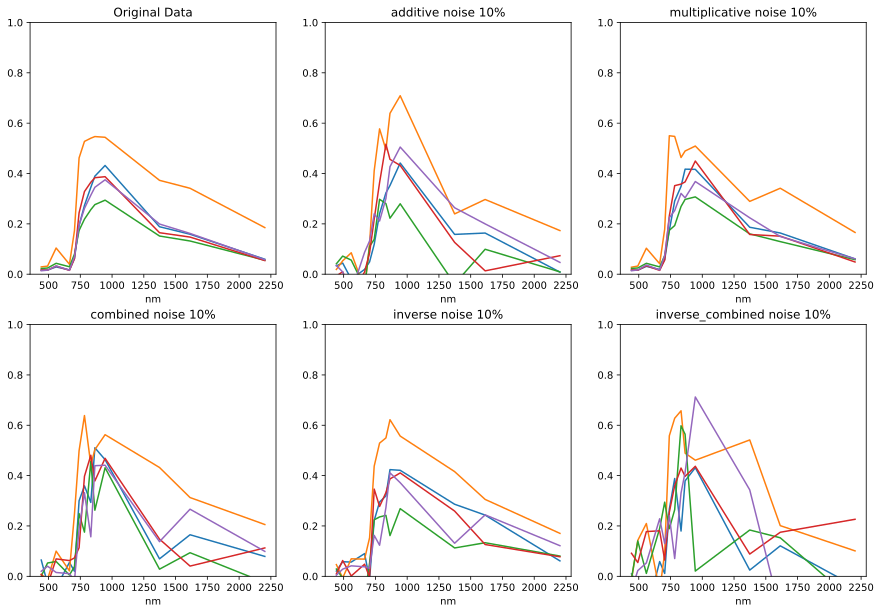

In [36]:
df = pd.concat(dfs, axis=0, ignore_index=True)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

df_sample = df.sample(5, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_types):
  df_noisy = pd.read_pickle(noisy_path + n + '.pkl')
  df_noisy_sample = df_noisy.sample(5, random_state=42)
  
  axs[i+1].set_title(f'{n} noise 10%')
  axs[i+1].plot(x, df_noisy_sample[cols].T, linestyle='-')
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 
  